In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import k3d
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model

from utilis.resize_label import *
from utilis.callbacks import *
from utilis.utilis import *
from models.unet import *
from models.encoders.vgg_encoder import *

# Get data and labels

In [2]:
coord_data_dir = "/data/cornucopia/ib255/derivative_datasets/cued_scene_coordinate_regression/data_from_jason/DS_003_JDB-Full/coordinates/"

In [3]:
data_size = 1
images = np.zeros((data_size, 2048, 4096, 3), dtype=np.int16)
labels = np.zeros((data_size, 2048, 4096, 3), dtype=np.float32)


for data in range(1,data_size + 1):
    if data < 10:
        data = "00" + str(data)
    elif data < 100:
        data = "0" + str(data)

    coord_npz = "0{}_rendered.png_config.npz".format(str(data))
    npz_data = np.load(coord_data_dir + coord_npz)
    
    images[int(data)-1,:,:,:] = npz_data['image_colors']
    labels[int(data)-1,:,:,:] = npz_data['points_3d_camera']

# Let's downsample image and label to 224x224 size

In [4]:
images_low = np.zeros((data_size, 224, 224, 3), dtype=np.int16)
labels_low = np.zeros((data_size, 224, 224, 3), dtype=np.float32)

for ind in range(data_size):
    images_low[ind,:,:,:] = cv2.resize(images[ind,:,:,:],(224, 224), interpolation = cv2.INTER_CUBIC)
    
for ind in range(data_size):
    labels_low[ind,:,:,:] = resize_coordinates(labels[ind,:,:,:], new_dim=(224,224))

In [18]:
smth = images_low[0] - images_low[0]

In [20]:
np.mean(smth, axis=-1).shape

(224, 224)

In [16]:
images_low[0,:,:,0].reshape(-1).shape

(50176,)

In [17]:
images_low[0].reshape(-1, images_low.shape[-1]).shape

(50176, 3)

# Artificially increse size of the dataset for testing

In [7]:
# images_new = np.concatenate((images_low, images_low), axis=0)
# labels_new = np.concatenate((labels_low, labels_low), axis=0)

In [18]:
# images_new = np.concatenate((images_new, images_new), axis=0)
# labels_new = np.concatenate((labels_new, labels_new), axis=0)

In [6]:
# images_new.shape

# Write a simple model

### single gpu

In [7]:
compile_configs = {'metrics': [keras.metrics.MeanAbsoluteError()]}

unet_model = vgg_unet()
unet_model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.0001), **compile_configs)

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.0420 - mean_absolute_error: 0.1407
Epoch 2/200
1/1 [==============================] - 0s 87ms/step - loss: 0.0415 - mean_absolute_error: 0.1396
Epoch 3/200
1/1 [==============================] - 0s 90ms/step - loss: 0.0410 - mean_absolute_error: 0.1386
Epoch 4/200
1/1 [==============================] - 0s 86ms/step - loss: 0.0406 - mean_absolute_error: 0.1378
Epoch 5/200
1/1 [==============================] - 0s 89ms/step - loss: 0.0401 - mean_absolute_error: 0.1368
Epoch 6/200
1/1 [==============================] - 0s 123ms/step - loss: 0.0397 - mean_absolute_error: 0.1361
Epoch 7/200
1/1 [==============================] - 0s 107ms/step - loss: 0.0393 - mean_absolute_error: 0.1350
Epoch 8/200
1/1 [==============================] - 0s 156ms/step - loss: 0.0389 - mean_absolute_error: 0.1345
Epoch 9/200
1/1 [==============================] - 0s 85ms/step - loss: 0.0385 - mean_absolute_error: 0.1335
Epoch 10/200
1/1 [

1/1 [==============================] - 0s 88ms/step - loss: 0.0221 - mean_absolute_error: 0.0954
Epoch 76/200
1/1 [==============================] - 0s 88ms/step - loss: 0.0220 - mean_absolute_error: 0.0952
Epoch 77/200
1/1 [==============================] - 0s 88ms/step - loss: 0.0218 - mean_absolute_error: 0.0947
Epoch 78/200
1/1 [==============================] - 0s 92ms/step - loss: 0.0217 - mean_absolute_error: 0.0947
Epoch 79/200
1/1 [==============================] - 0s 109ms/step - loss: 0.0214 - mean_absolute_error: 0.0935
Epoch 80/200
1/1 [==============================] - 0s 92ms/step - loss: 0.0214 - mean_absolute_error: 0.0933
Epoch 81/200
1/1 [==============================] - 1s 1s/step - loss: 0.0212 - mean_absolute_error: 0.0936
Epoch 82/200
1/1 [==============================] - 0s 102ms/step - loss: 0.0211 - mean_absolute_error: 0.0928
Epoch 83/200
1/1 [==============================] - 0s 98ms/step - loss: 0.0210 - mean_absolute_error: 0.0929
Epoch 84/200
1/1 [=====

1/1 [==============================] - 0s 101ms/step - loss: 0.0153 - mean_absolute_error: 0.0775
Epoch 149/200
1/1 [==============================] - 0s 104ms/step - loss: 0.0152 - mean_absolute_error: 0.0772
Epoch 150/200
1/1 [==============================] - 0s 101ms/step - loss: 0.0151 - mean_absolute_error: 0.0771
Epoch 151/200
1/1 [==============================] - 0s 103ms/step - loss: 0.0150 - mean_absolute_error: 0.0766
Epoch 152/200
1/1 [==============================] - 0s 102ms/step - loss: 0.0149 - mean_absolute_error: 0.0762
Epoch 153/200
1/1 [==============================] - 0s 103ms/step - loss: 0.0148 - mean_absolute_error: 0.0761
Epoch 154/200
1/1 [==============================] - 0s 130ms/step - loss: 0.0148 - mean_absolute_error: 0.0759
Epoch 155/200
1/1 [==============================] - 0s 130ms/step - loss: 0.0147 - mean_absolute_error: 0.0757
Epoch 156/200
1/1 [==============================] - 0s 104ms/step - loss: 0.0146 - mean_absolute_error: 0.0756
Epoch 

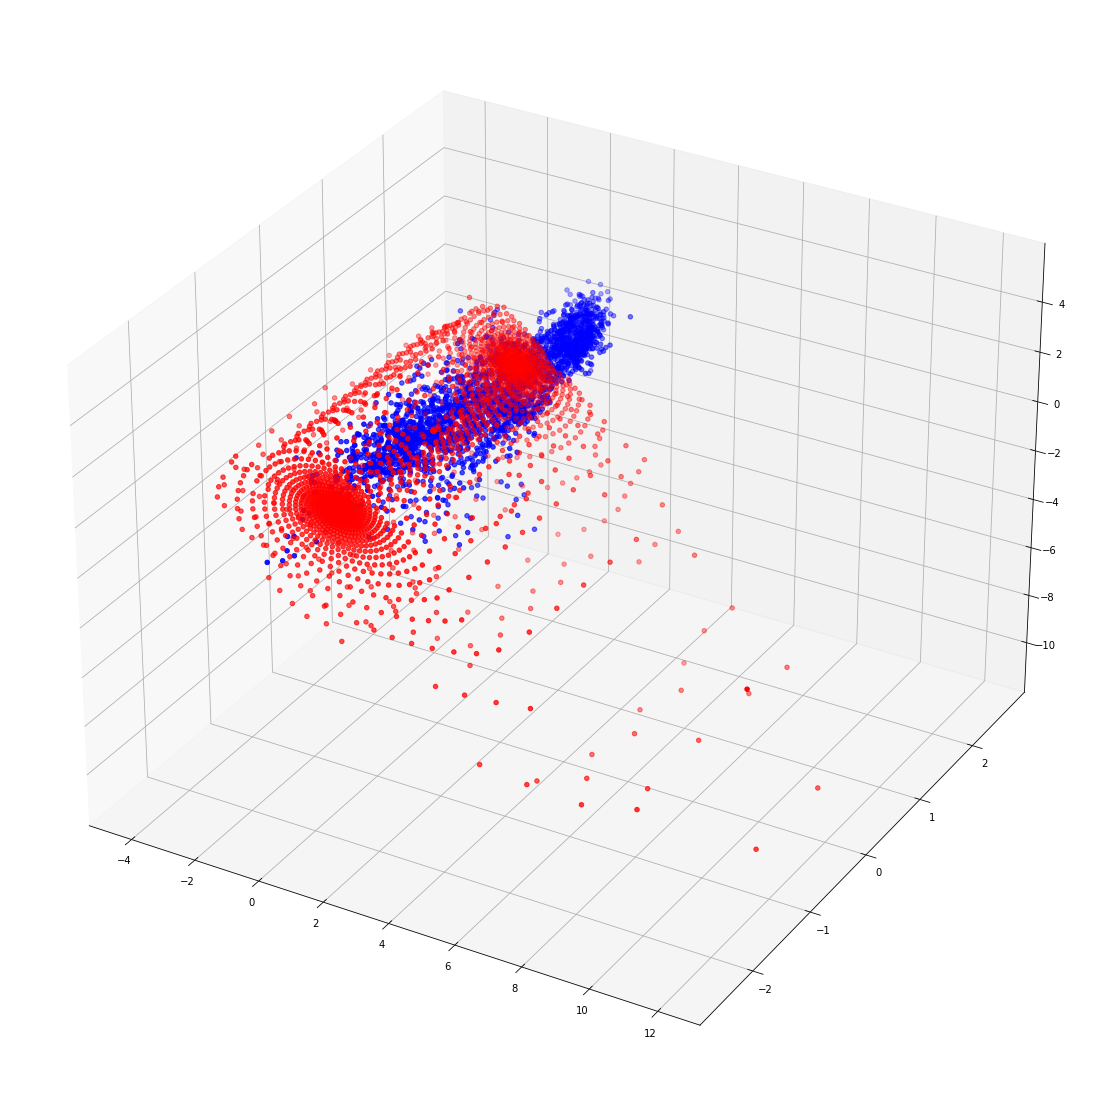

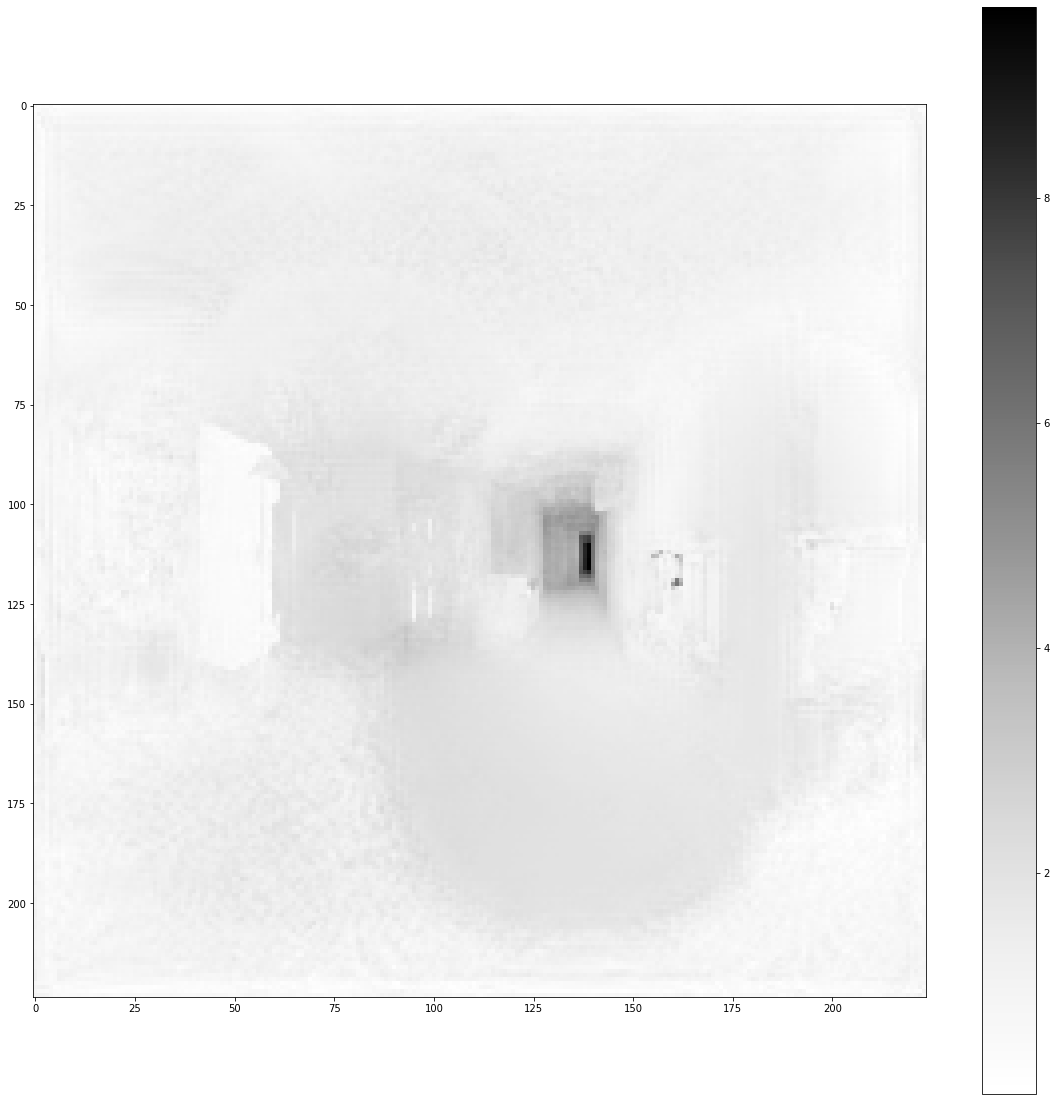

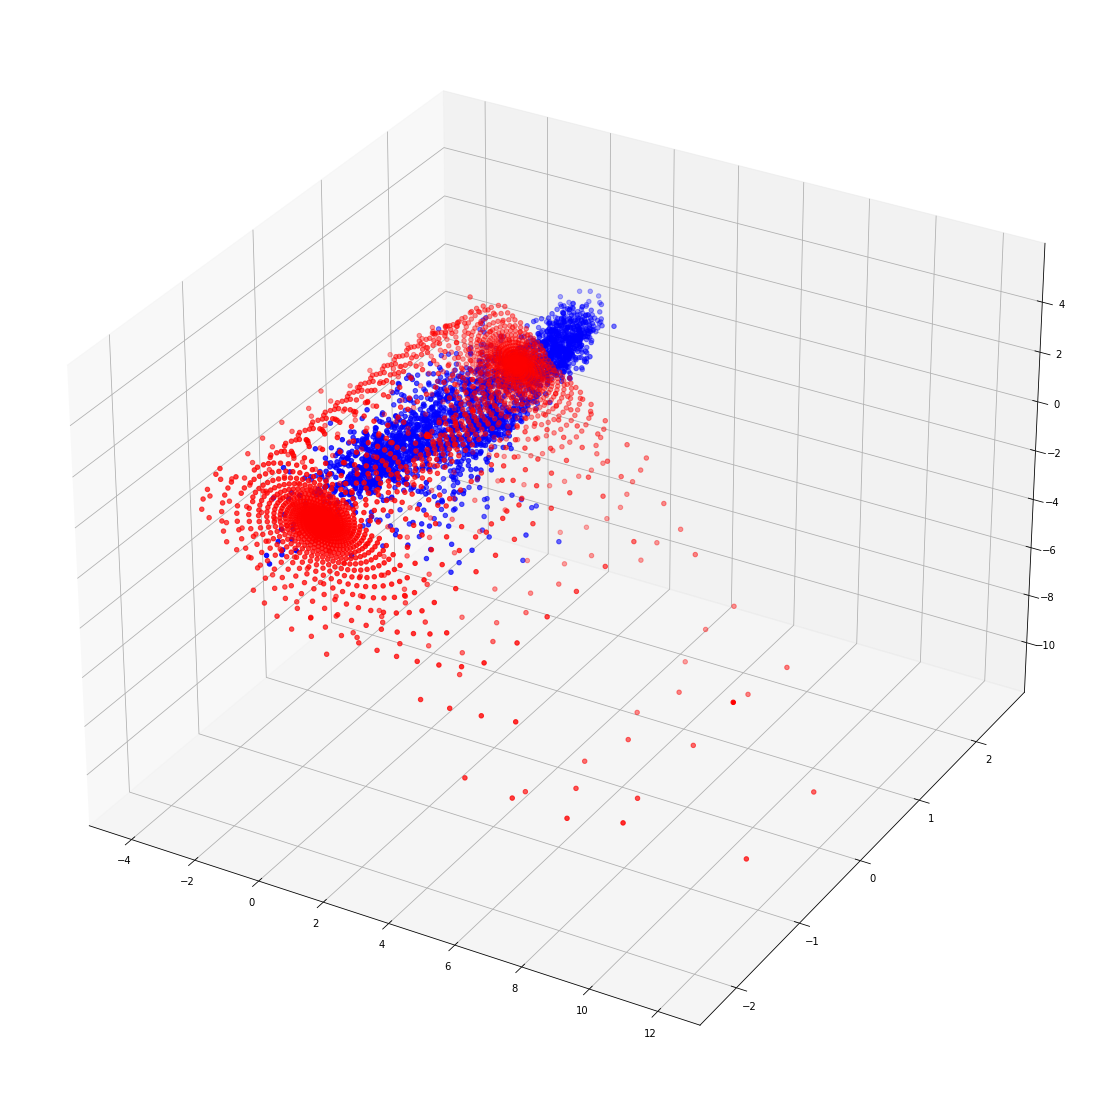

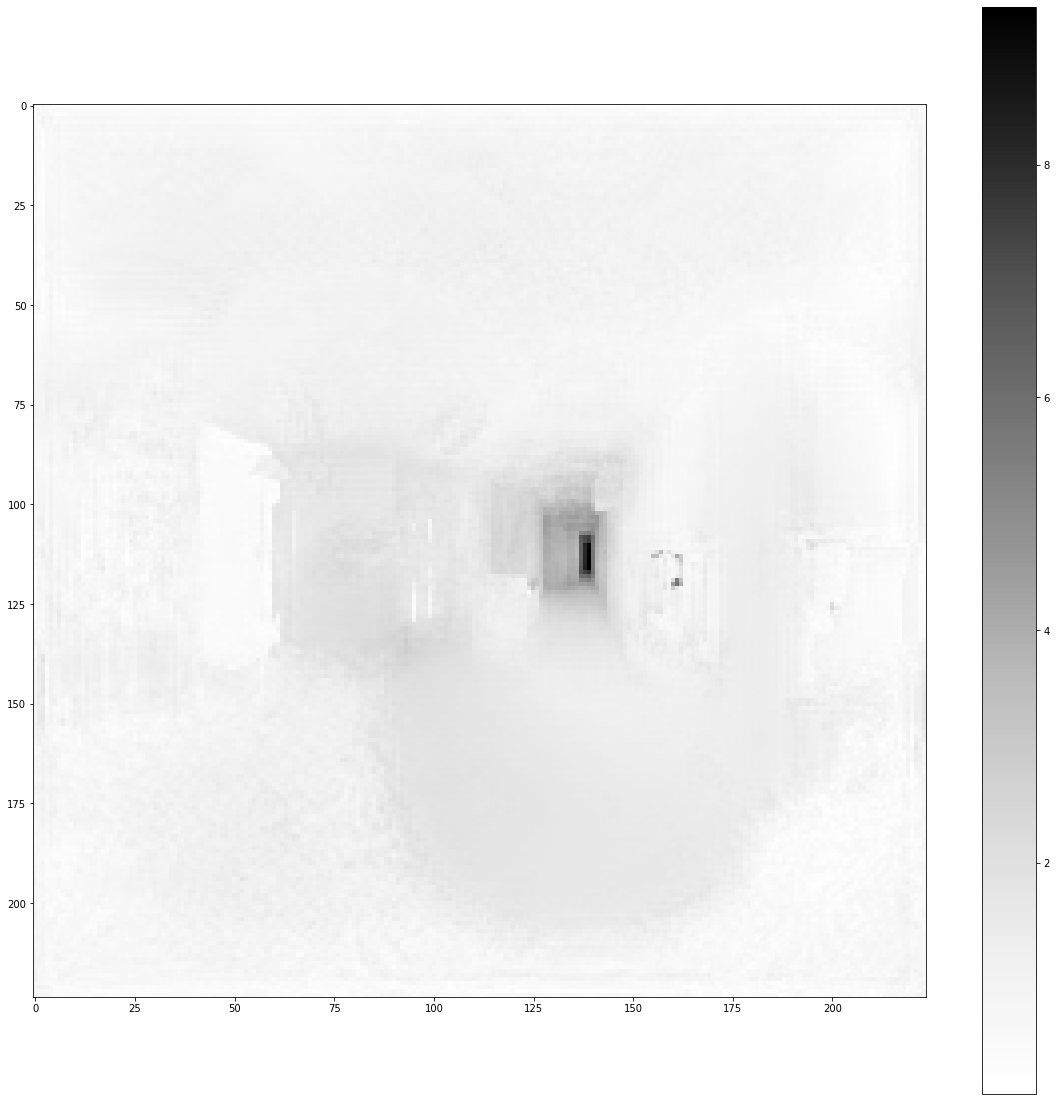

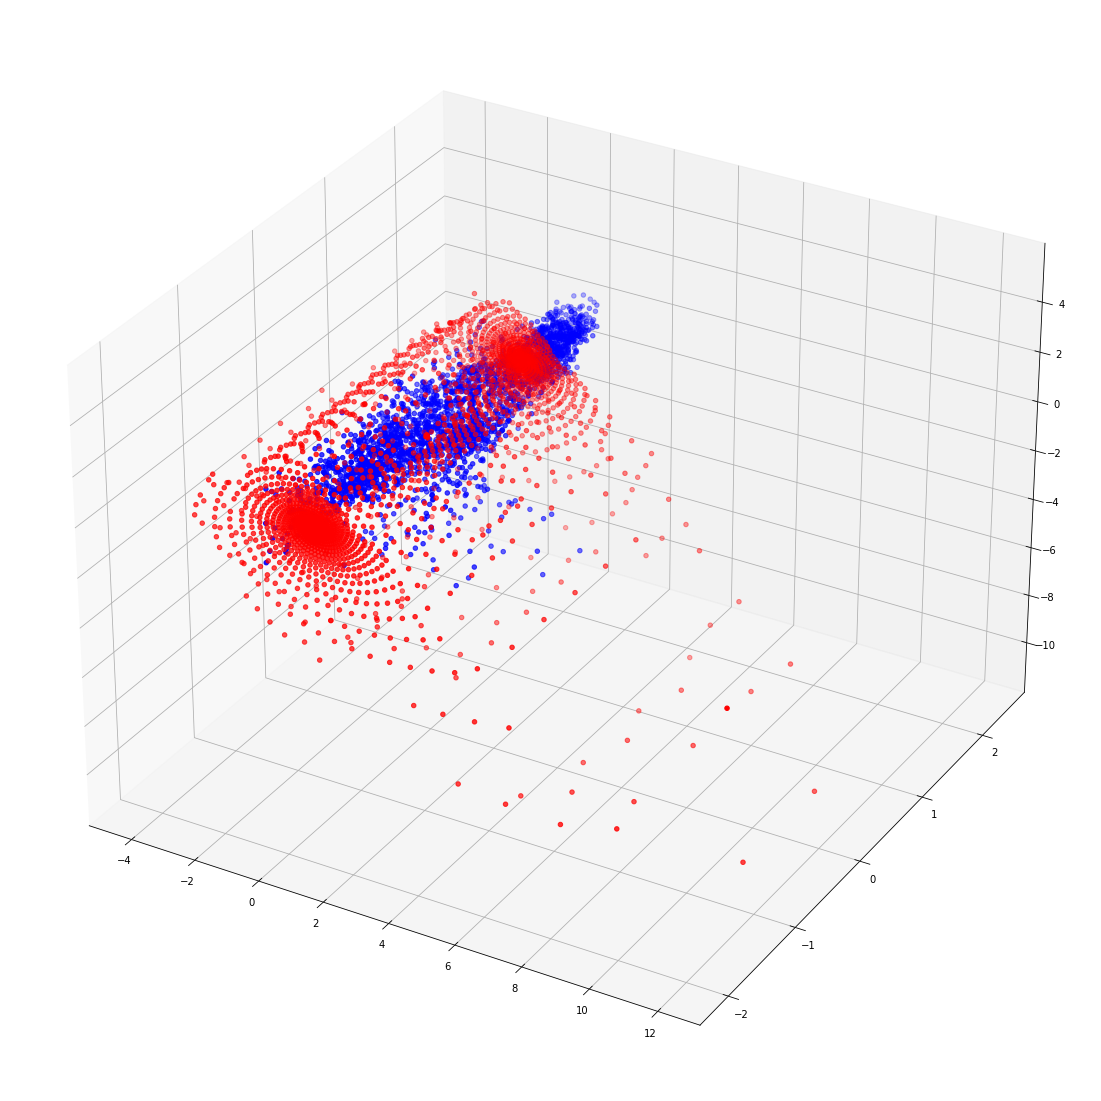

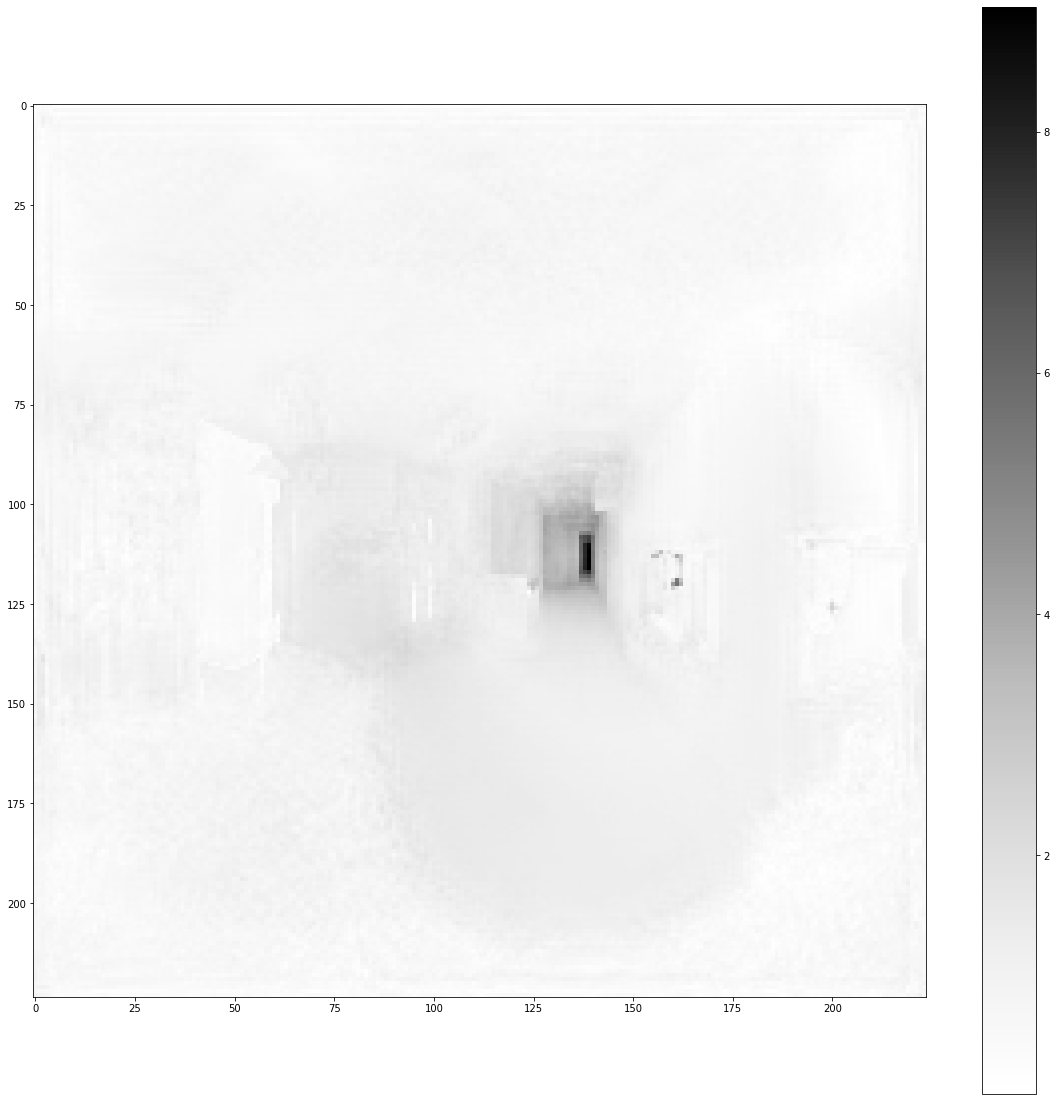

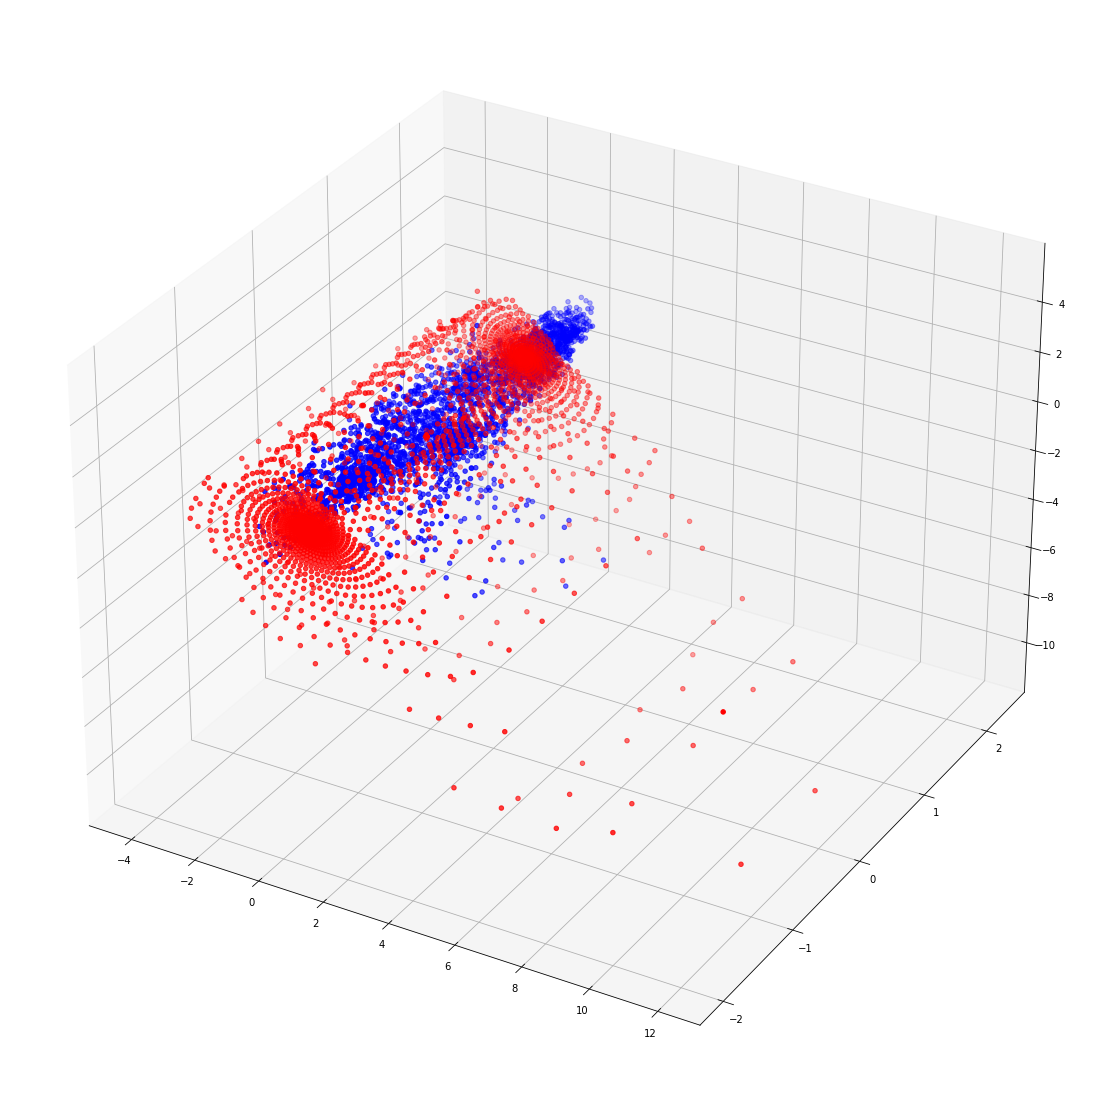

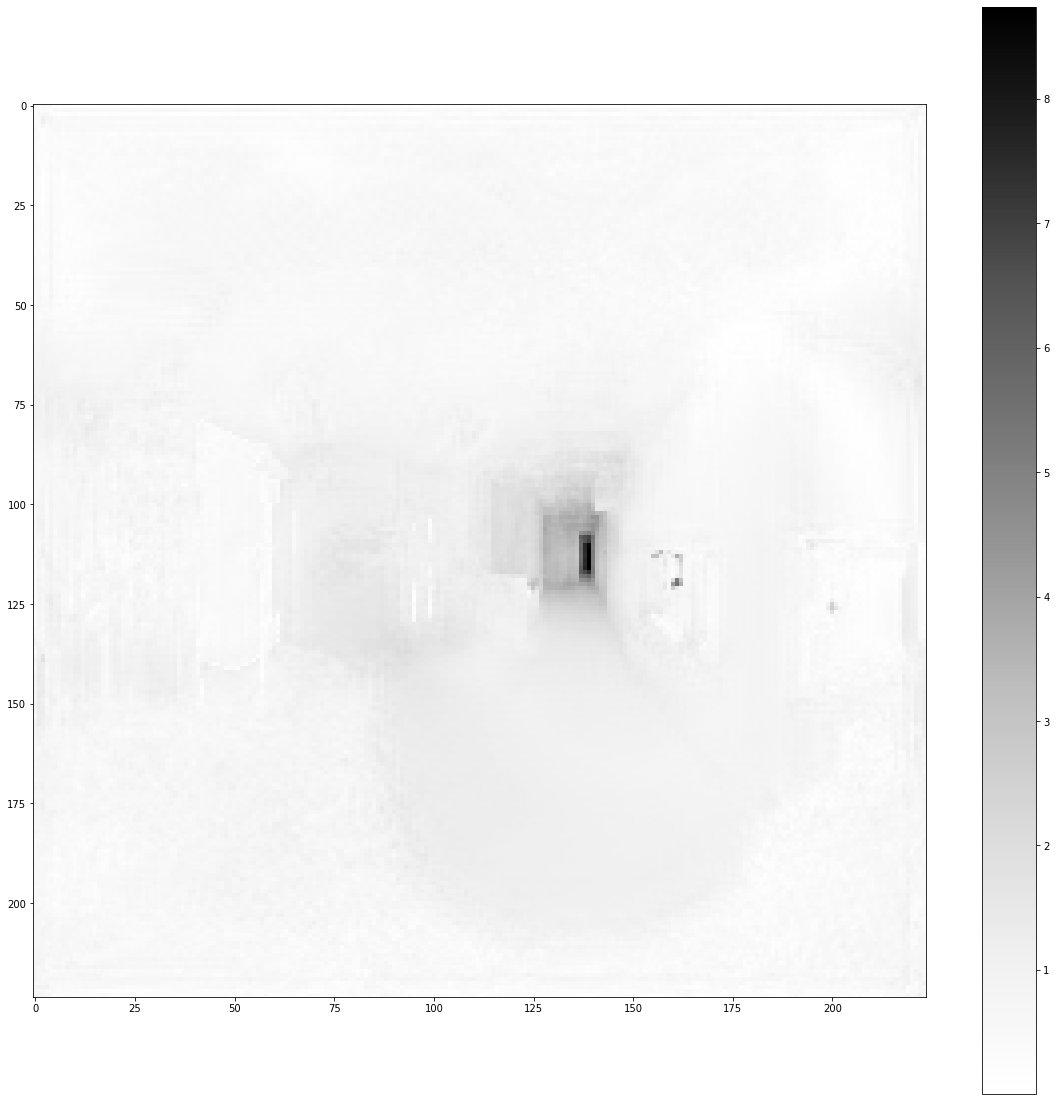

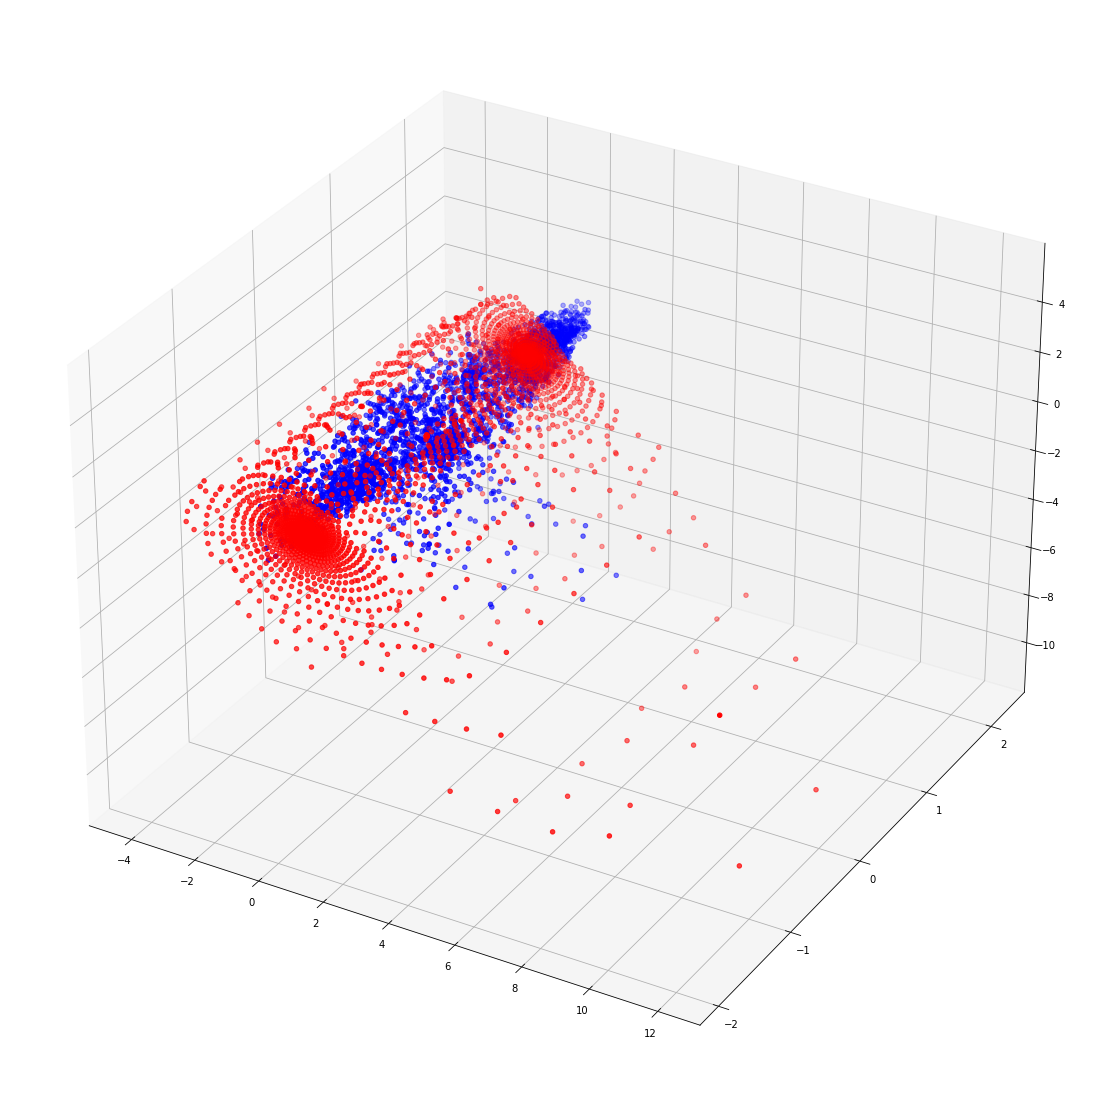

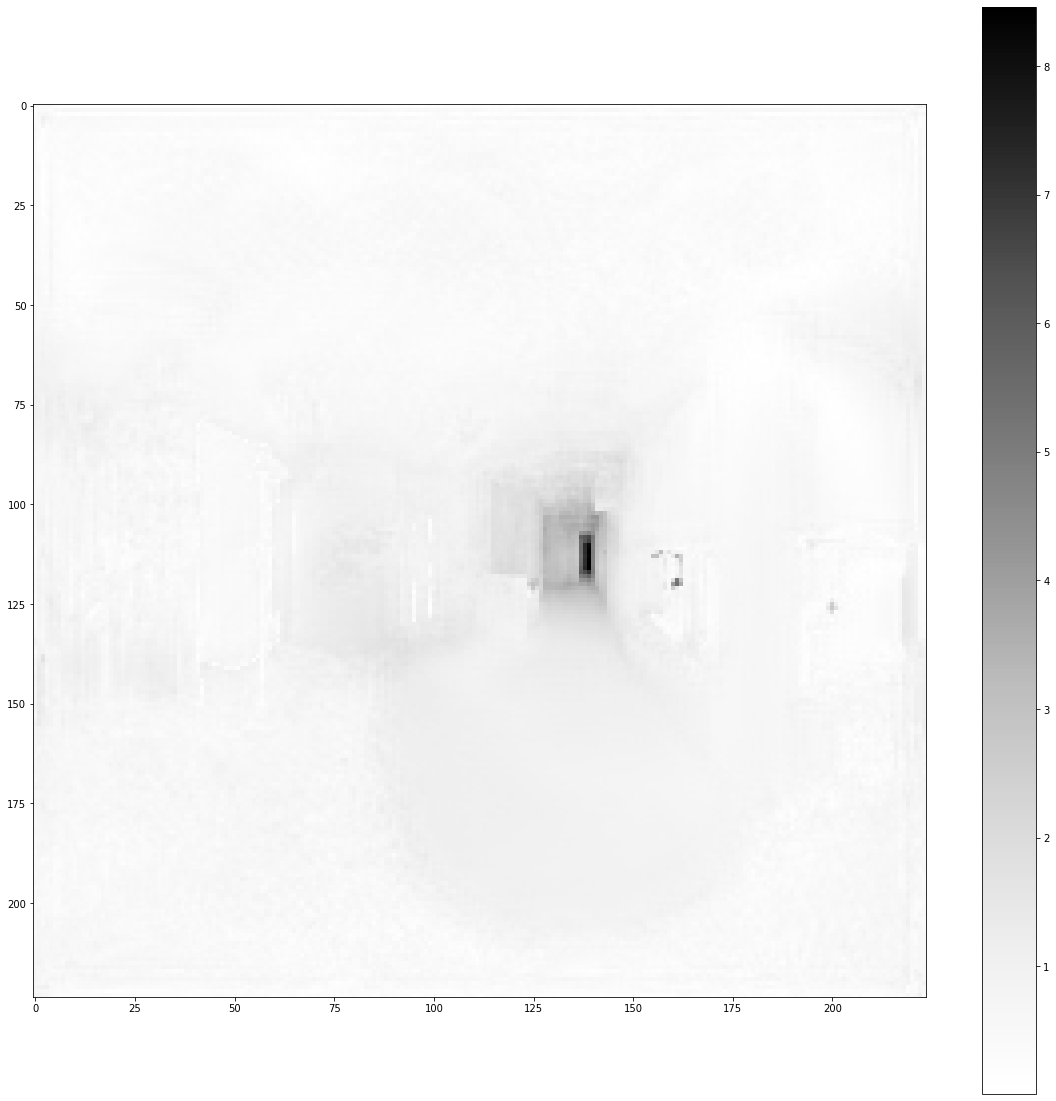

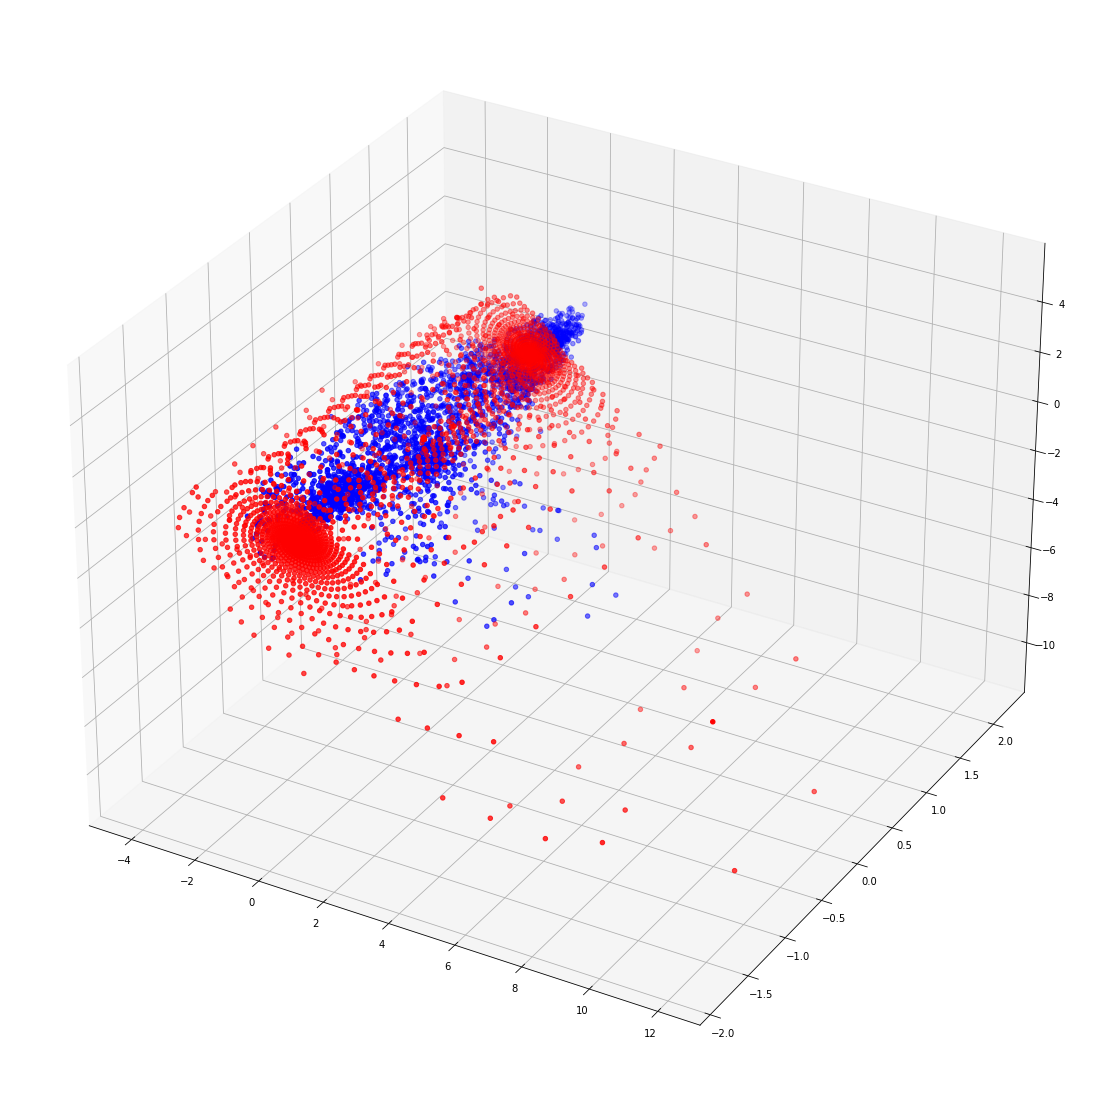

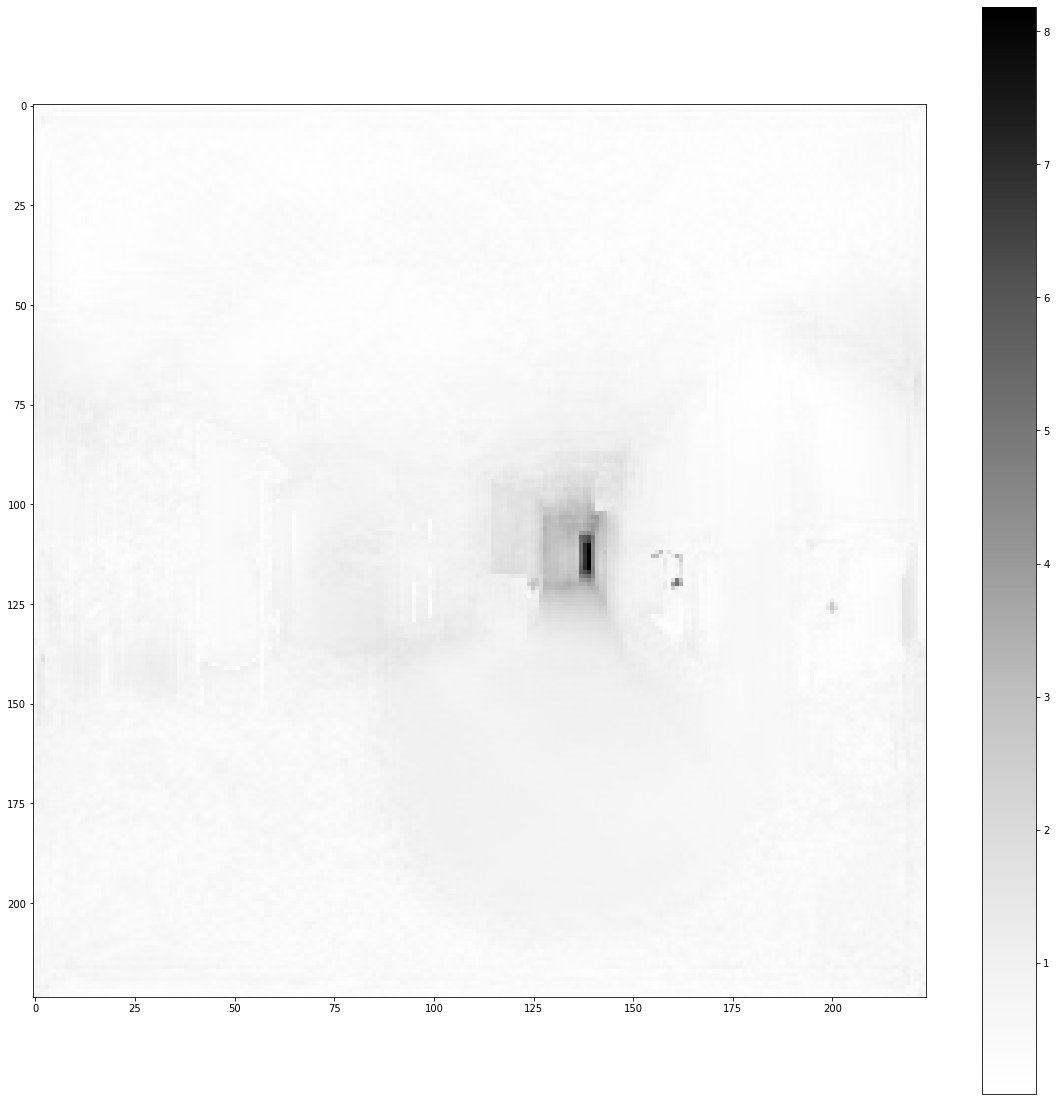

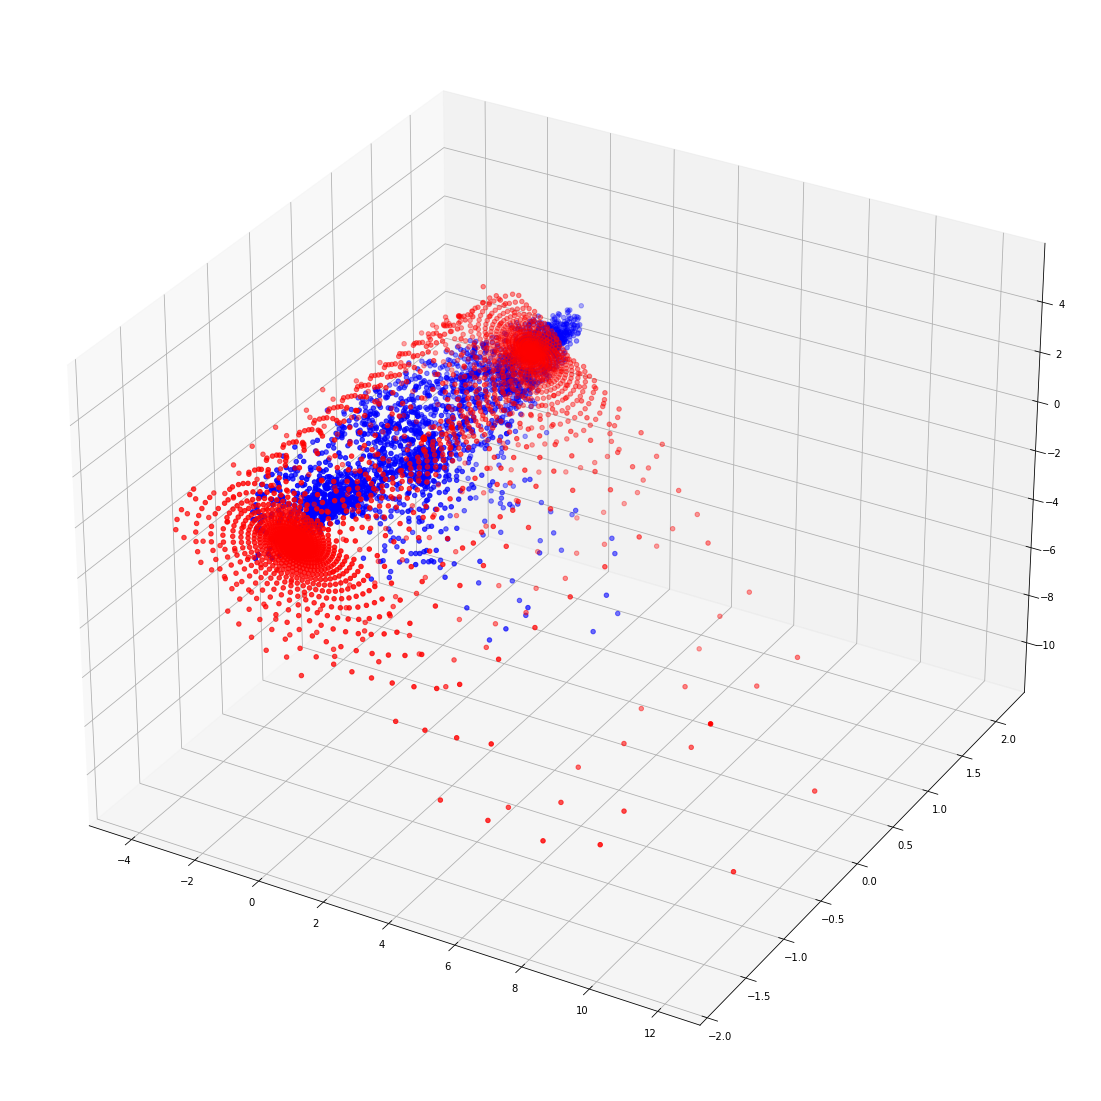

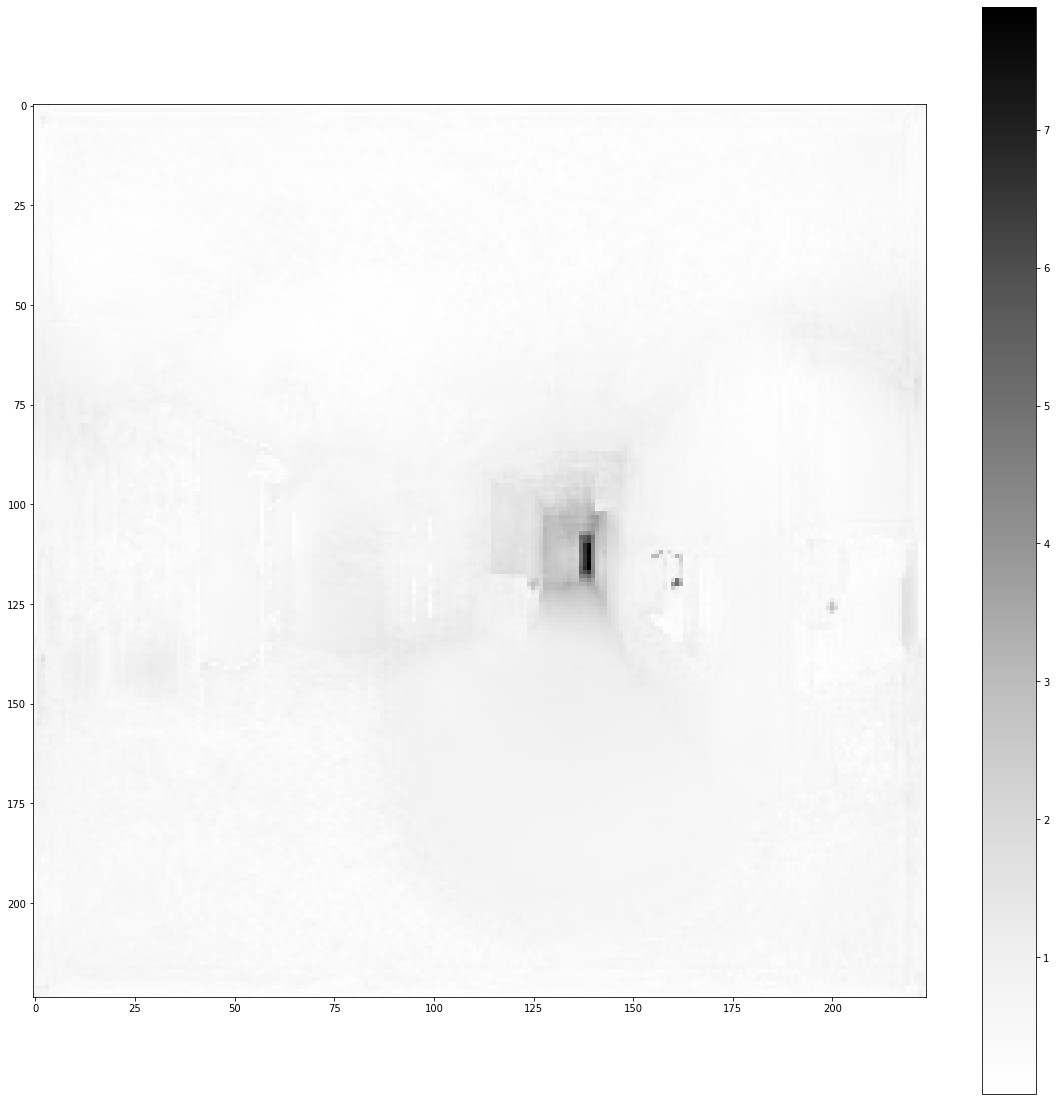

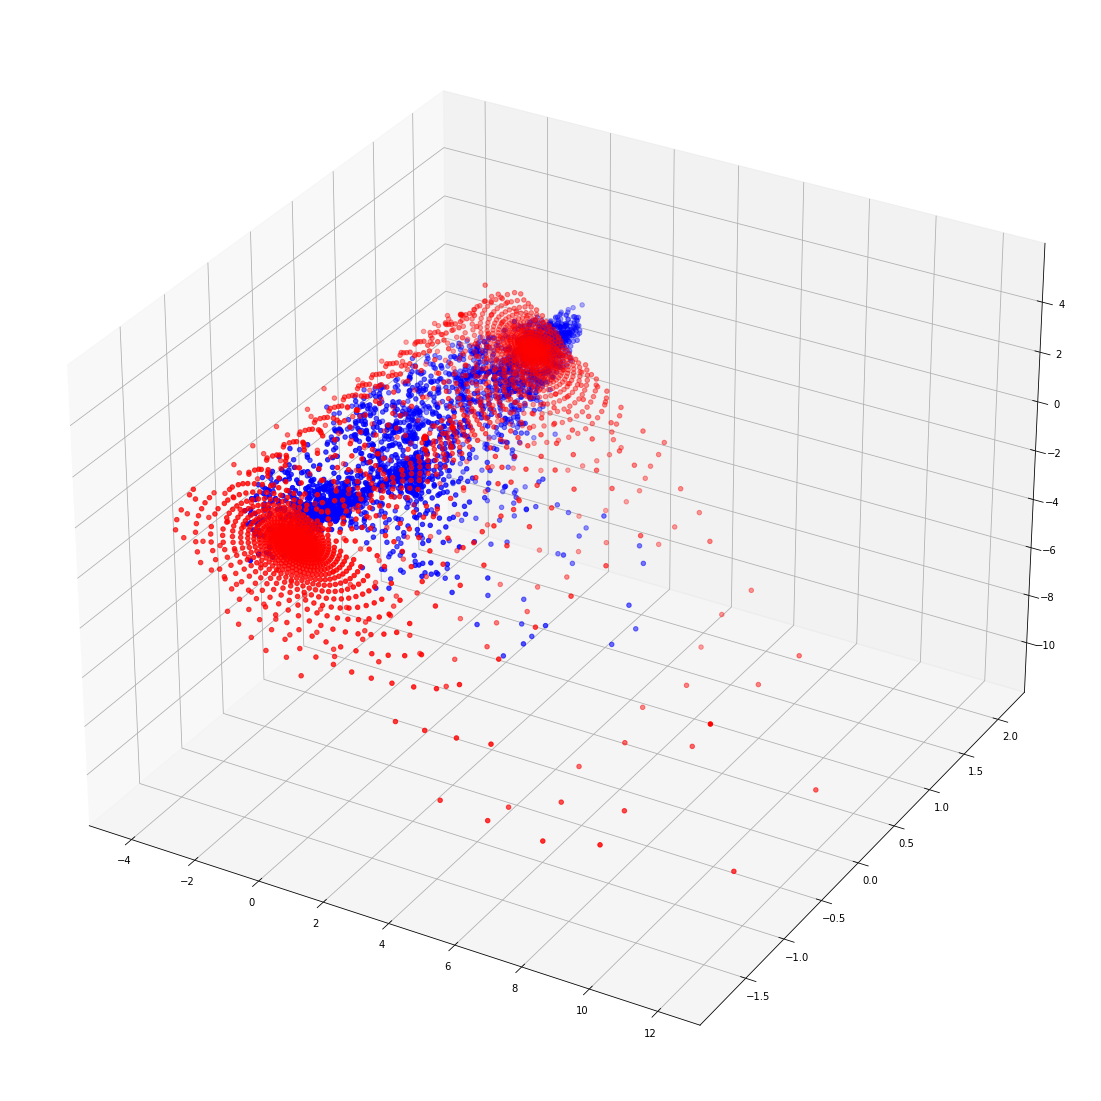

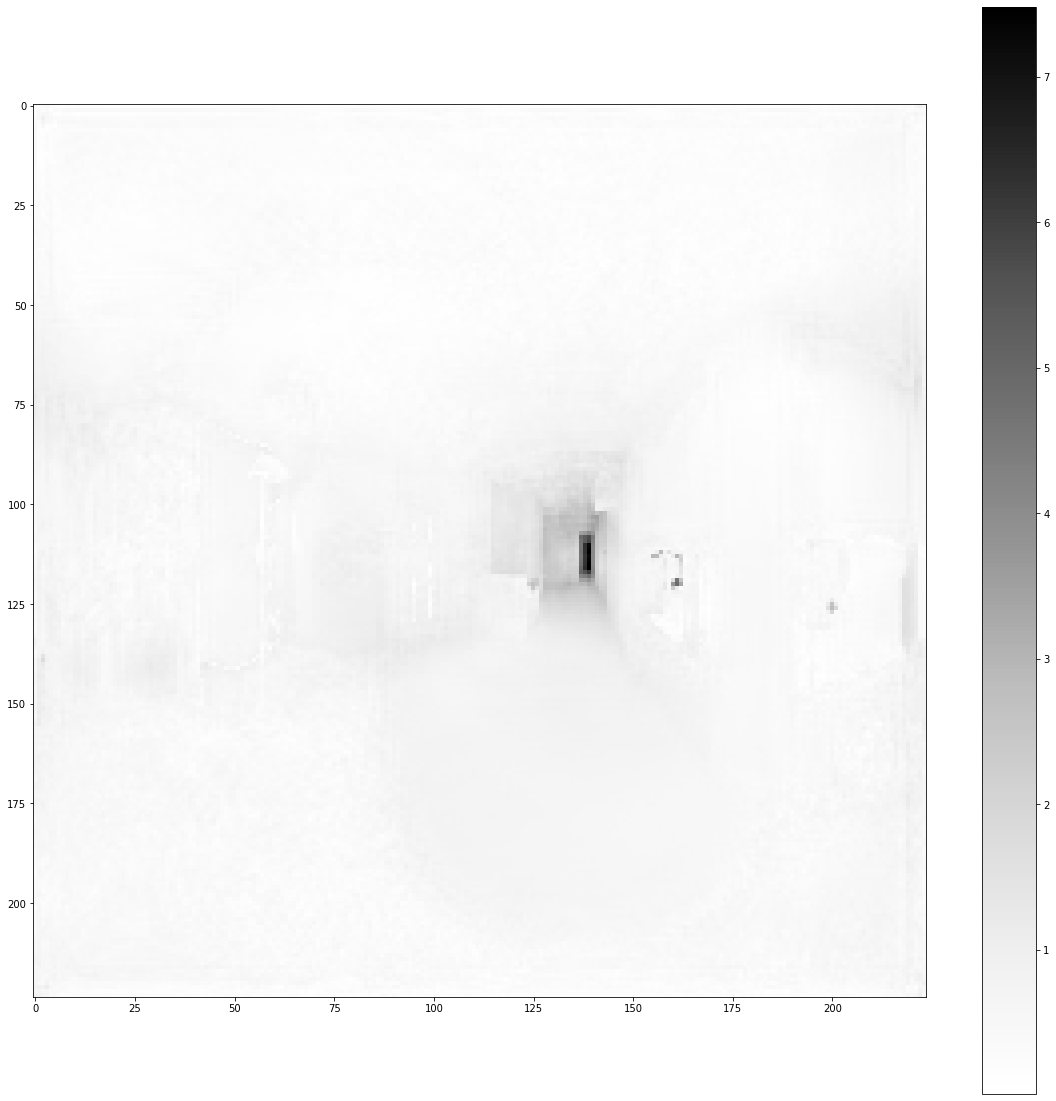

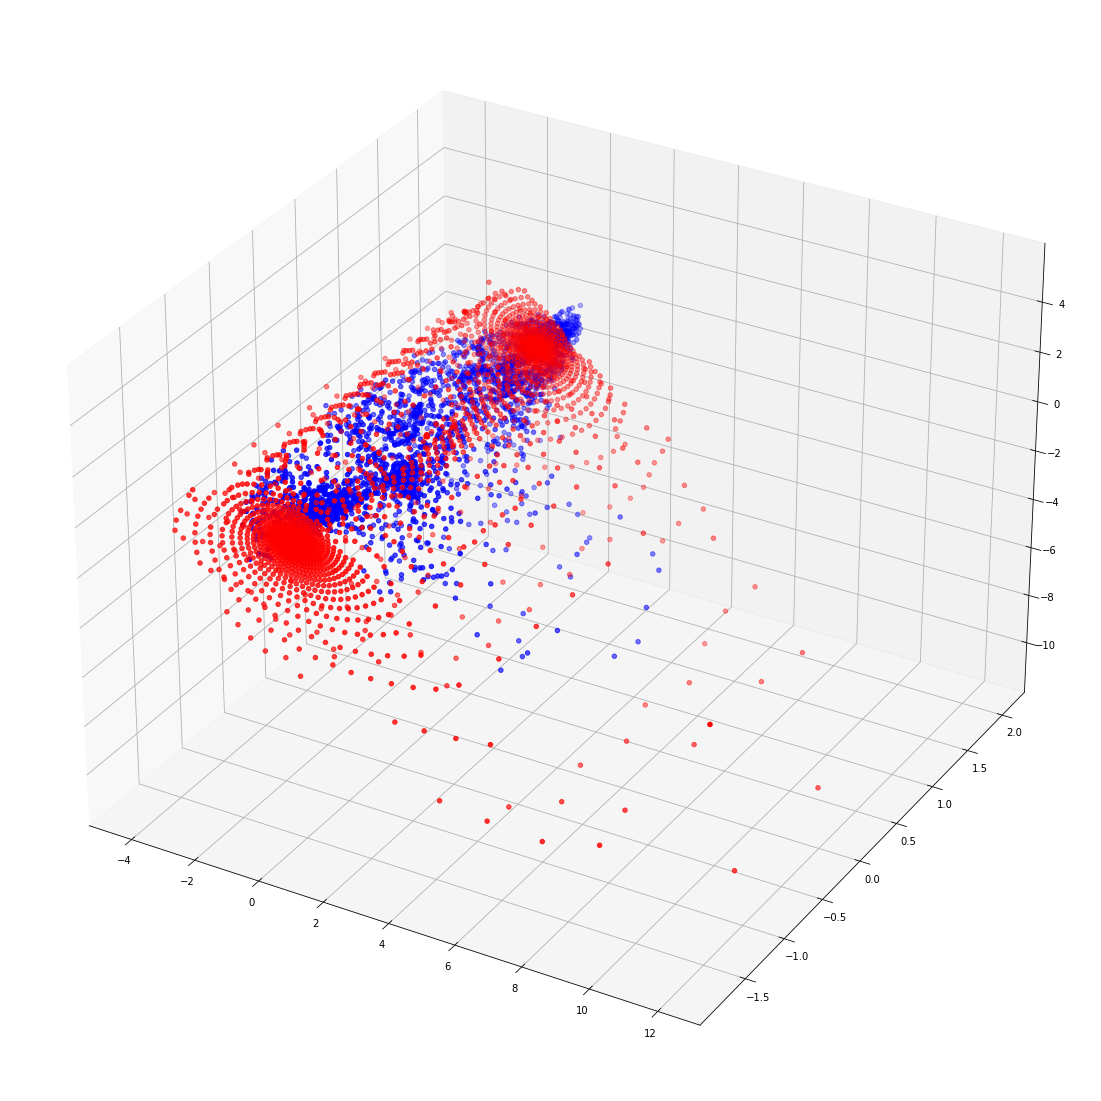

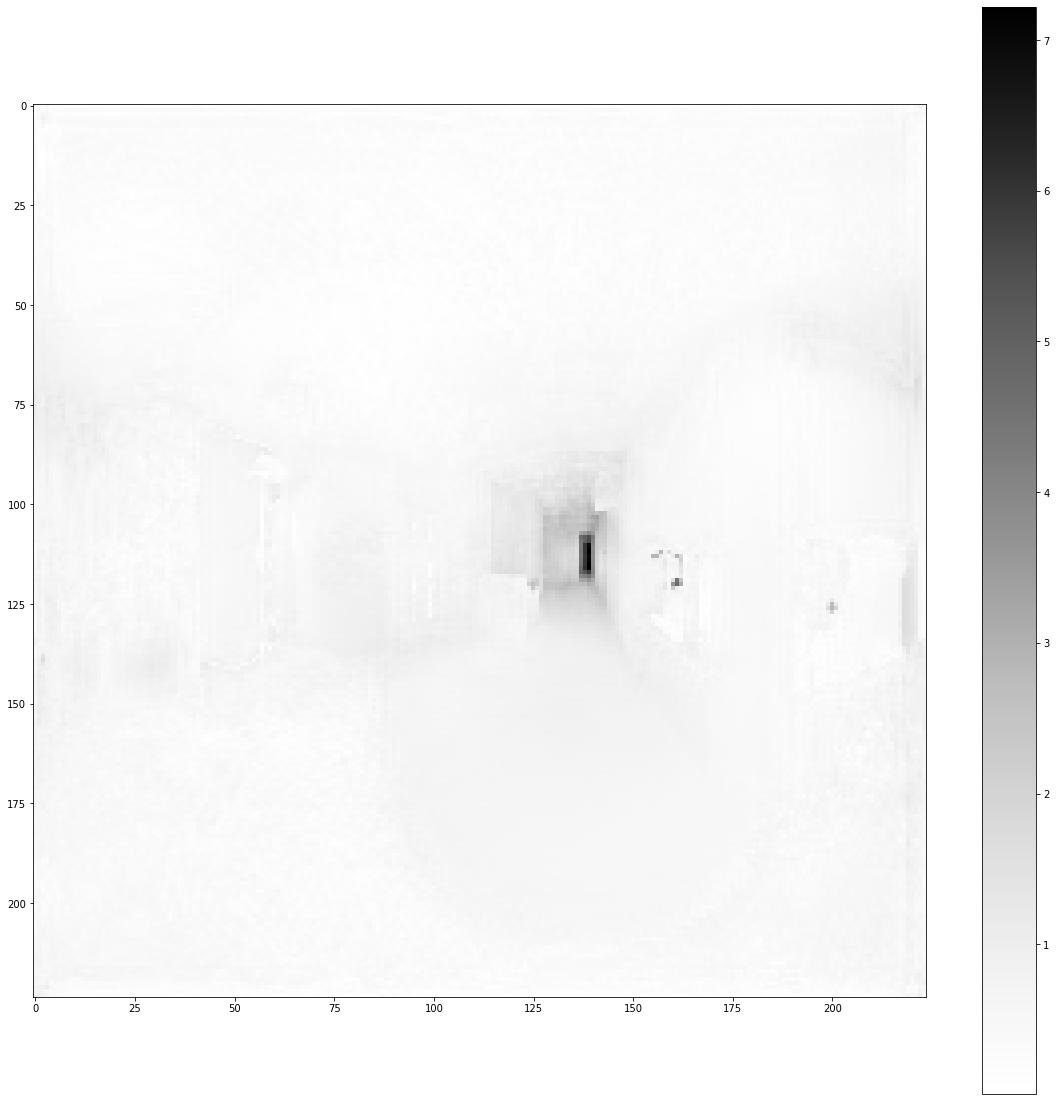

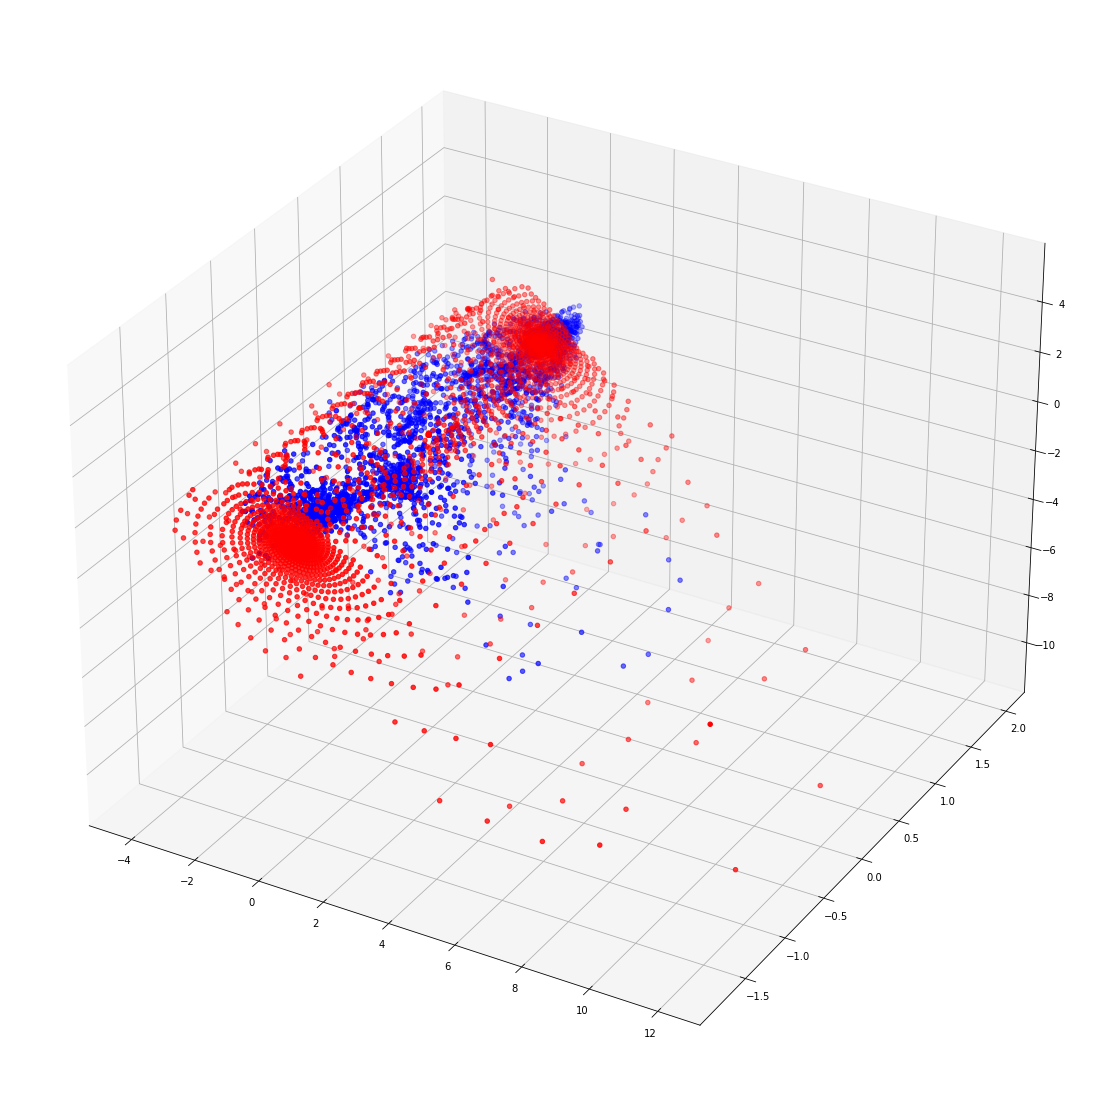

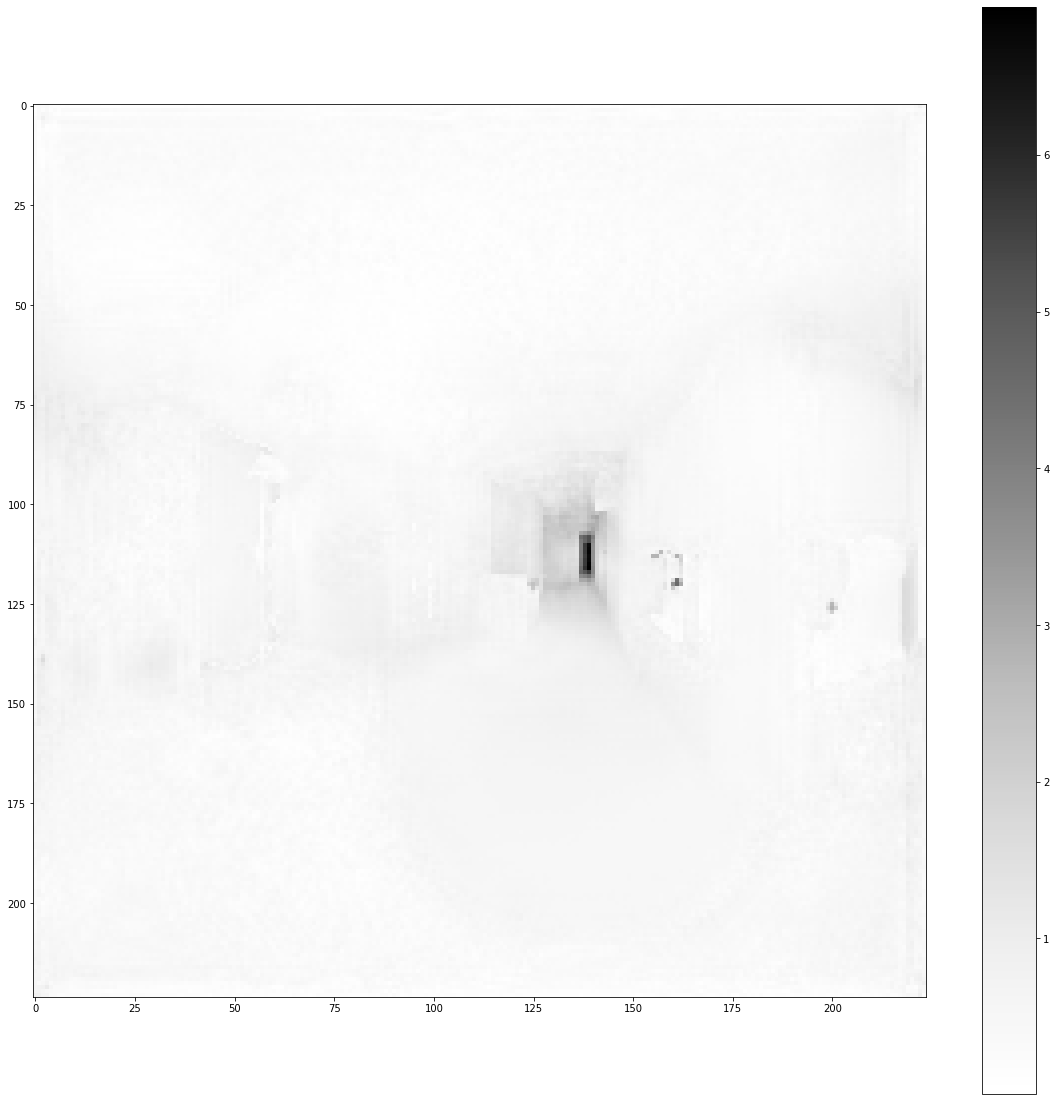

In [9]:
fit_configs = {'callbacks': [RemoveGarbageCallback(),
                             Visualise_learning(images_low[0], labels_low[0], 20, "testing_callbacks")
                                              ],
#                'batch_size': 128,
               'epochs': 200,
               'verbose': 1}

unet_model.fit(x=images_low, y=labels_low, **fit_configs)

### multiple gpu

In [23]:
get_available_gpus()

['/device:GPU:0',
 '/device:GPU:1',
 '/device:GPU:2',
 '/device:GPU:3',
 '/device:GPU:4',
 '/device:GPU:5',
 '/device:GPU:6',
 '/device:GPU:7']

In [29]:
# def vgg_unet(input_height=224, input_width=224):

#     model = unet(vgg_encoder, input_height=input_height, input_width=input_width)
#     model.model_name = "vgg_unet"
    
#     return model

In [31]:
strategy = tf.distribute.MirroredStrategy(['/device:GPU:2', '/device:GPU:3', '/device:GPU:4', '/device:GPU:5'])
print('Number of devices: {}'.format(strategy.num_replicas_in_sync))

with strategy.scope():
    
    compile_configs = {'metrics': [keras.metrics.MeanAbsoluteError()]}
                   
    fit_configs = {'callbacks': [RemoveGarbaseCallback(),
    #                            Visualise_learning(images_low[0], labels_low[0]
                                                  ],
                   'batch_size': 128,
                   'epochs': 5,
                   'verbose': 1}
    
    unet_model = vgg_unet()
    unet_model.compile(loss='mse', optimizer=keras.optimizers.Adam(0.0001), **compile_configs)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5')
Number of devices: 4


In [32]:
unet_model.fit(x=images_new, y=labels_new, **fit_configs)

Epoch 1/5
INFO:tensorflow:batch_all_reduce: 46 all-reduces with algorithm = nccl, num_packs = 1
INFO:tensorflow:batch_all_reduce: 46 all-reduces with algorithm = nccl, num_packs = 1
4/4 [==============================] - 2s 432ms/step - loss: 3.1559 - mean_absolute_error: 1.2825
Epoch 2/5
4/4 [==============================] - 2s 422ms/step - loss: 1.3058 - mean_absolute_error: 0.8429
Epoch 3/5
4/4 [==============================] - 2s 451ms/step - loss: 0.7855 - mean_absolute_error: 0.6390
Epoch 4/5
4/4 [==============================] - 2s 468ms/step - loss: 0.5099 - mean_absolute_error: 0.5173
Epoch 5/5
4/4 [==============================] - 2s 447ms/step - loss: 0.3681 - mean_absolute_error: 0.4432


In [33]:
del unet_model

In [62]:
pred_y = unet_model.predict(images_low)

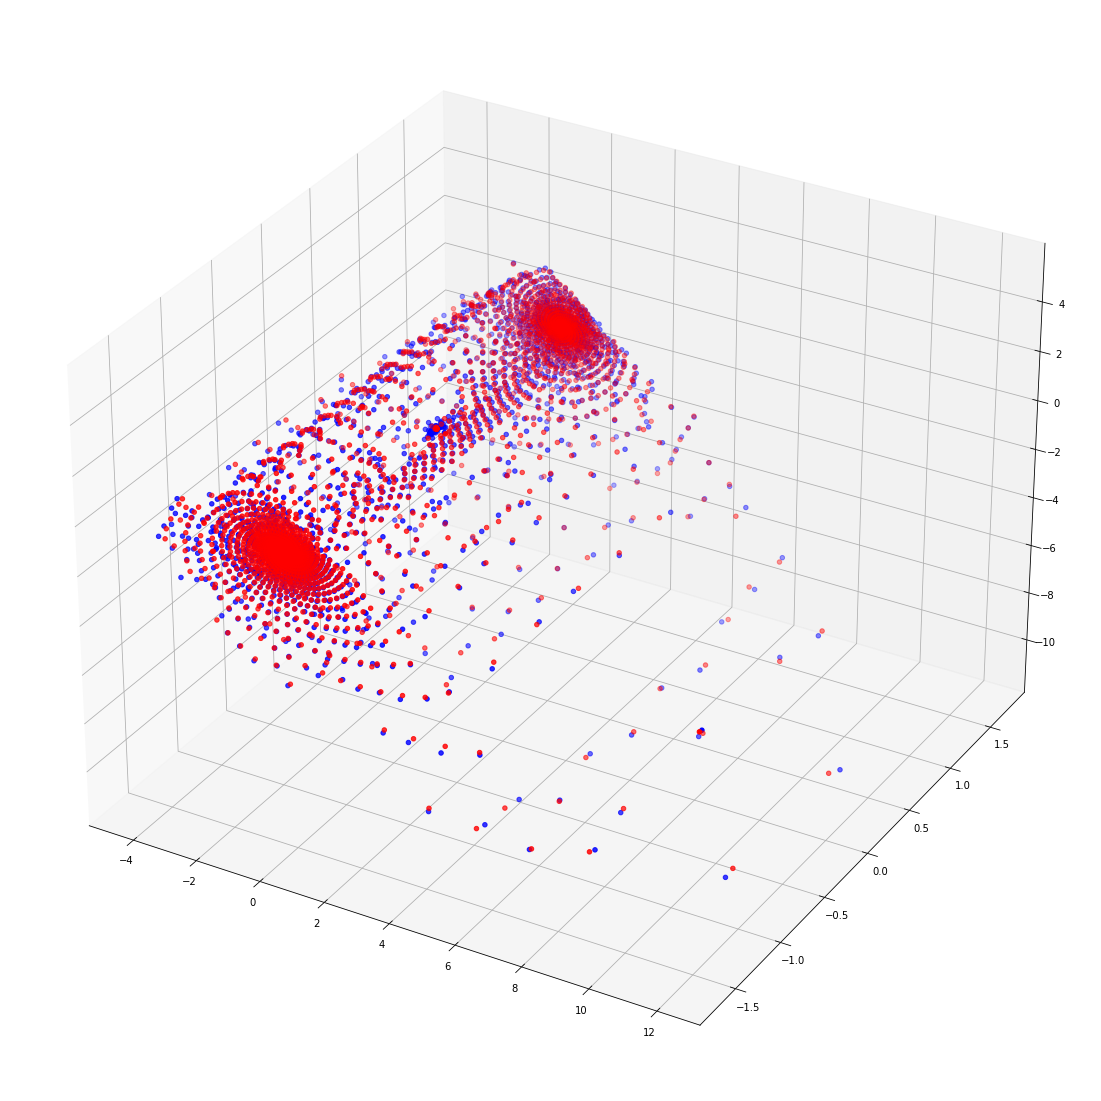

In [103]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')

xyz = labels_low[0,:,:,:].reshape(-1, labels_low[0,:,:,:].shape[-1])[::20]
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='r', marker='o')

xyz = pred_y[0,:,:,:].reshape(-1, pred_y[0,:,:,:].shape[-1])[::20]
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='b', marker='o')

In [92]:
plot = k3d.plot(name='points')
plt_points = k3d.points(positions=labels_low[2], point_size=0.2, color=0xff0000, alpha=0.5)
plot += plt_points
plt_points = k3d.points(positions=pred_y[2], point_size=0.2, color=0x0000ff, alpha=0.5)
plot += plt_points
plt_points.shader='3d'
plot.display()

Output()

In [93]:
plot.fetch_screenshot()

In [94]:
with open('screenshot.png', 'wb') as f:
#     try:
#         out = plot.screenshot.decode('base64')
#     except: # Python 3
    from base64 import b64decode
    out = b64decode(plot.screenshot)    
    f.write(out)
    
Image(url='screenshot.png')

In [82]:
plot.screenshot

''

In [75]:
image_dir = plot.screenshot
img = mpimg.imread(image_dir)
plt.imshow(img)

AttributeError: 'str' object has no attribute 'read'

TypeError: Image data of dtype <U1 cannot be converted to float

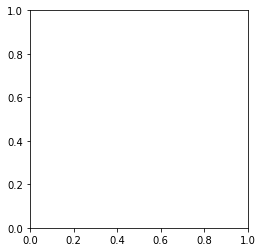

In [69]:
plt.imshow(plot.screenshot)